<a href="https://colab.research.google.com/github/ayberkuslu/MLProject/blob/master/rfc_cleaning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New Section

In [2]:
data=pd.read_csv('/content/test.csv')
# data_values=pd.read_csv('/content/sample_data/labels.csv')
# data = data_values.merge(data_labels, on='id')

##status_group-functional,non-functional or needs repair

amount_tsh – Total static head (amount water available to waterpoint)

date_recorded – The date the row was entered

funder – Who funded the well

gps_height – Altitude of the well

installer – Organization that installed the well

longitude – GPS coordinate

latitude – GPS coordinate

wpt_name – Name of the waterpoint if there is one

num_private -No description

basin – Geographic water basin

subvillage – Geographic location

region – Geographic location

region_code – Geographic location (coded)

district_code – Geographic location (coded)

lga – Geographic location

ward – Geographic location

population – Population around the well

public_meeting – True/False

recorded_by – Group entering this row of data

scheme_management – Who operates the water point

scheme_name – Who operates the water point

permit – If the water point is permitted

construction_year – Year the water point was constructed

extraction_type – The kind of extraction the water point uses

extraction_type_group – The kind of extraction the water point uses

extraction_type_class – The kind of extraction the water point uses

management – How the water point is managed

management_group – How the water point is managed

payment – What the water costs

payment_type – What the water costs

water_quality – The quality of the water

quality_group – The quality of the water

quantity – The quantity of water

quantity_group – The quantity of water

source – The source of the water

source_type – The source of the water

source_class – The source of the water

waterpoint_type – The kind of waterpoint

waterpoint_type_group – The kind of waterpoint

In [3]:
data.isnull().sum()
data.population.min()
data['gps_height'].replace(0.0, np.nan, inplace=True)
data['population'].replace(0.0, np.nan, inplace=True)
data['amount_tsh'].replace(0.0, np.nan, inplace=True)
data.isnull().sum()

id                          0
amount_tsh               8714
date_recorded               0
funder                    718
gps_height                  0
installer                 723
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            692
recorded_by                 0
scheme_management         800
scheme_name              5888
permit                    614
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [4]:
data.groupby(['region','permit']).size() 

region         permit
Arusha         False      50
               True      507
Dar es Salaam  False     180
Dodoma         False     265
               True      224
Iringa         False     416
               True      677
Kagera         False     183
               True      534
Kigoma         False     253
               True      334
Kilimanjaro    False      91
               True      823
Lindi          False     145
               True      176
Manyara        False      23
               True      302
Mara           False     111
               True      208
Mbeya          False     283
               True      414
Morogoro       False       9
               True      844
Mtwara         False      74
               True      273
Mwanza         False      29
               True      631
Pwani          False     237
               True      342
Rukwa          False     131
               True      243
Ruvuma         False     165
               True      375
Shinyanga      False 

In [5]:
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)
data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    718
gps_height                  0
installer                 723
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            692
recorded_by                 0
scheme_management         800
scheme_name              5888
permit                    614
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [6]:
print(data.latitude.max()-data.latitude.min())
print(data.longitude.max()-data.longitude.min())

11.56459193
40.32501564


In [7]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])
data[features].head(20)
data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    718
gps_height                  0
installer                 723
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            692
recorded_by                 0
scheme_management         800
scheme_name              5888
permit                    614
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [8]:
"""
plt.figure(figsize=(13,6))
sns.countplot(data.status_group, palette = 'Set3')
data.status_group.value_counts()
"""

AttributeError: ignored

<Figure size 936x432 with 0 Axes>

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

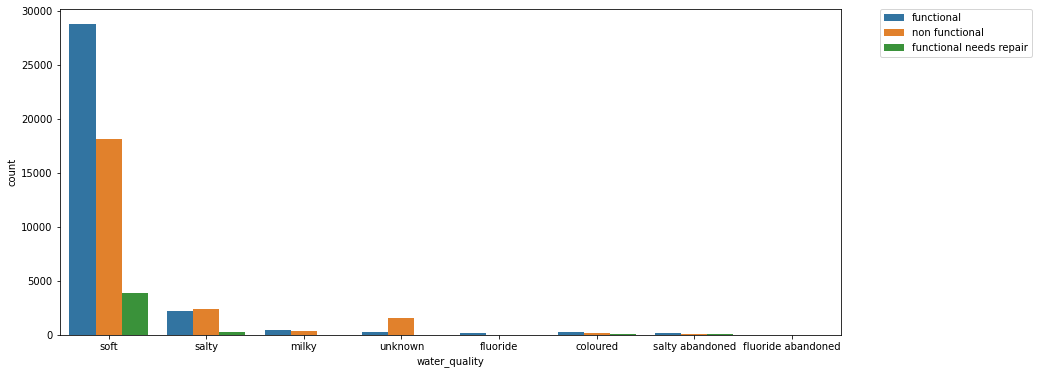

In [ ]:
"""
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()
"""

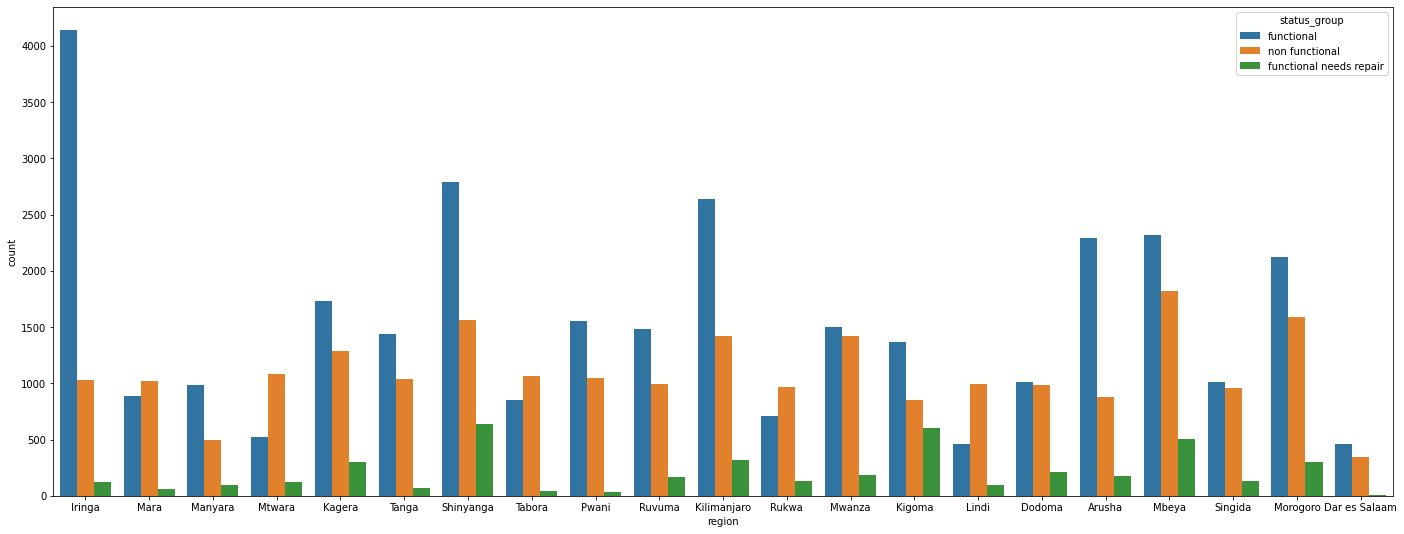

In [ ]:
#looking at regions
"""
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='region',hue='status_group')
"""

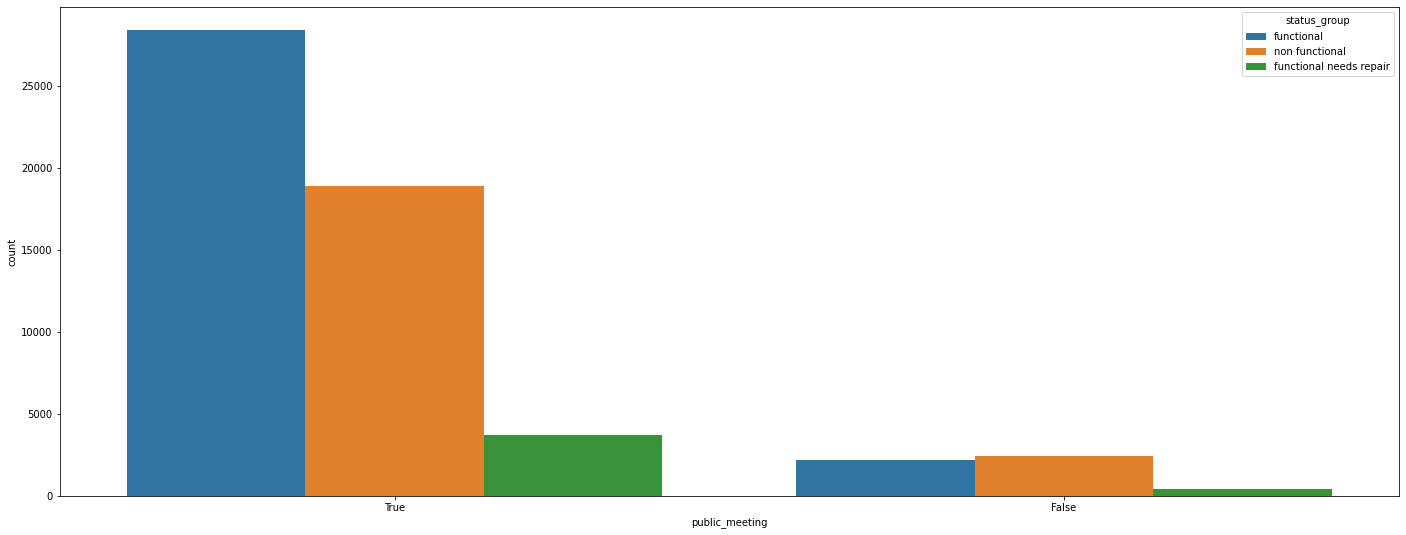

In [ ]:
""""
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='public_meeting',hue='status_group')
"""

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


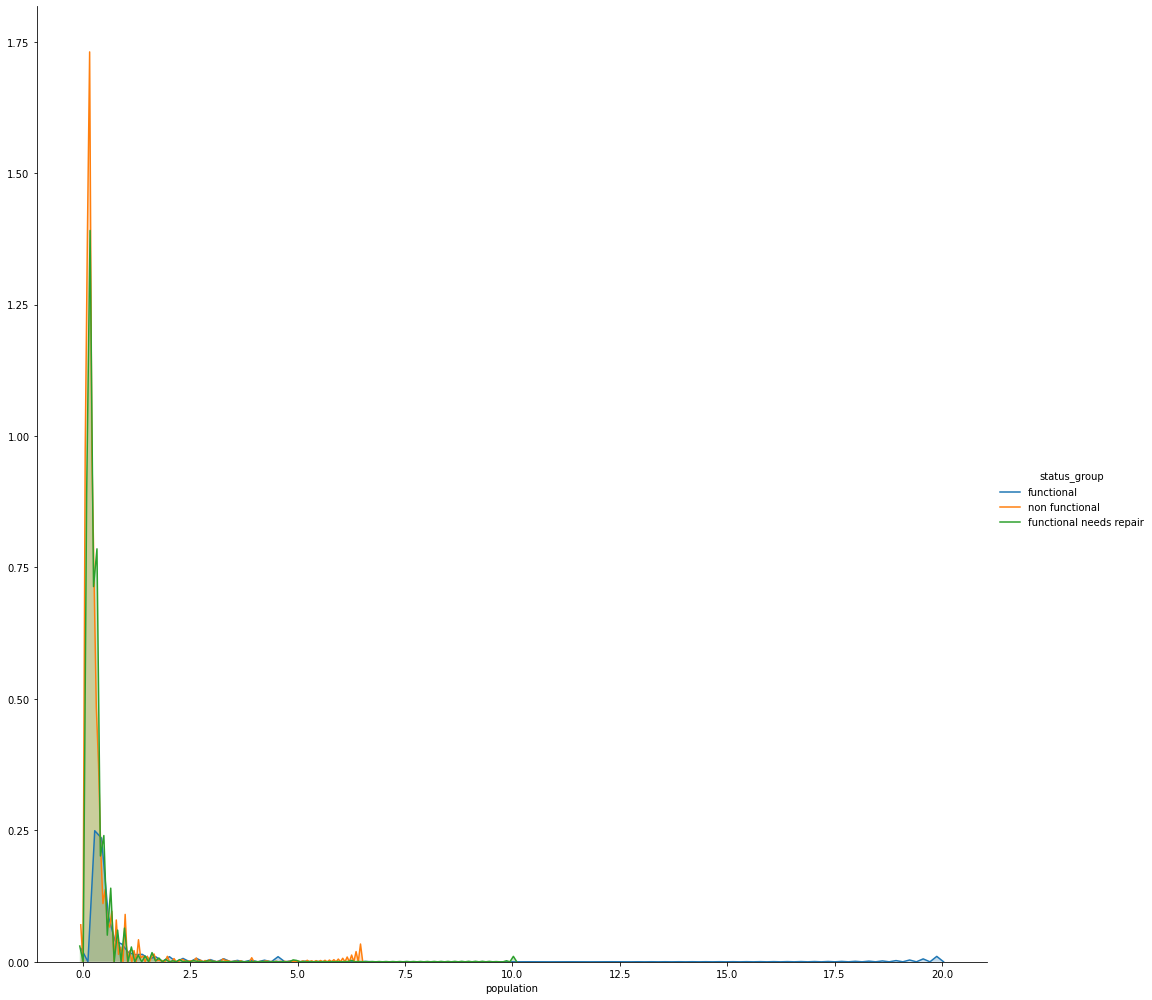

In [ ]:
""""(sns
  .FacetGrid(data, 
             hue='status_group',size=14)
  .map(sns.kdeplot, 'population', shade=True)
 .add_legend()
)
""""


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


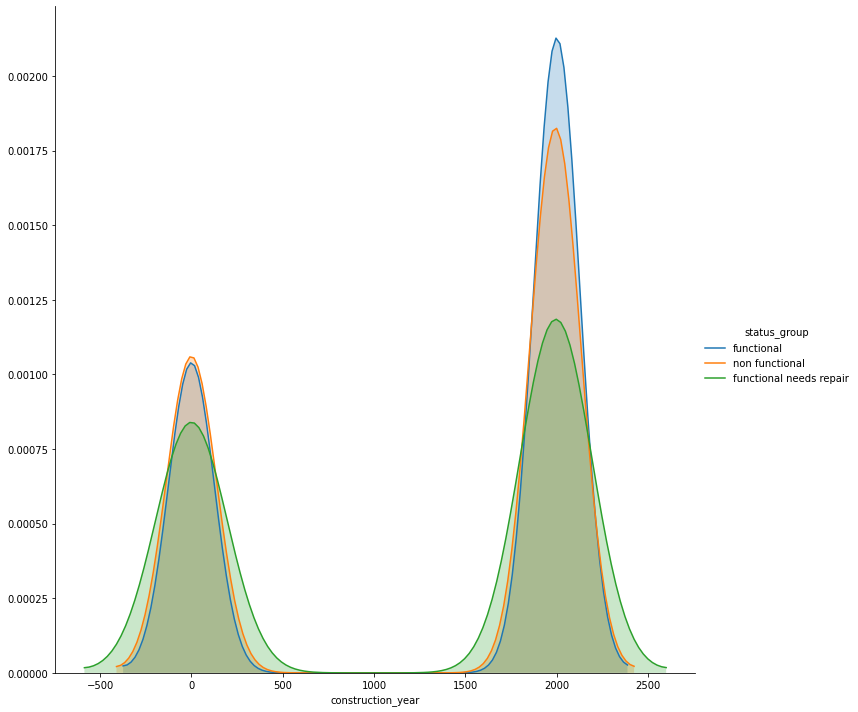

In [ ]:
# (sns
#   .FacetGrid(data, 
#              hue='status_group',size=10)
#   .map(sns.kdeplot, 'construction_year', shade=True)
#  .add_legend()
# )

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


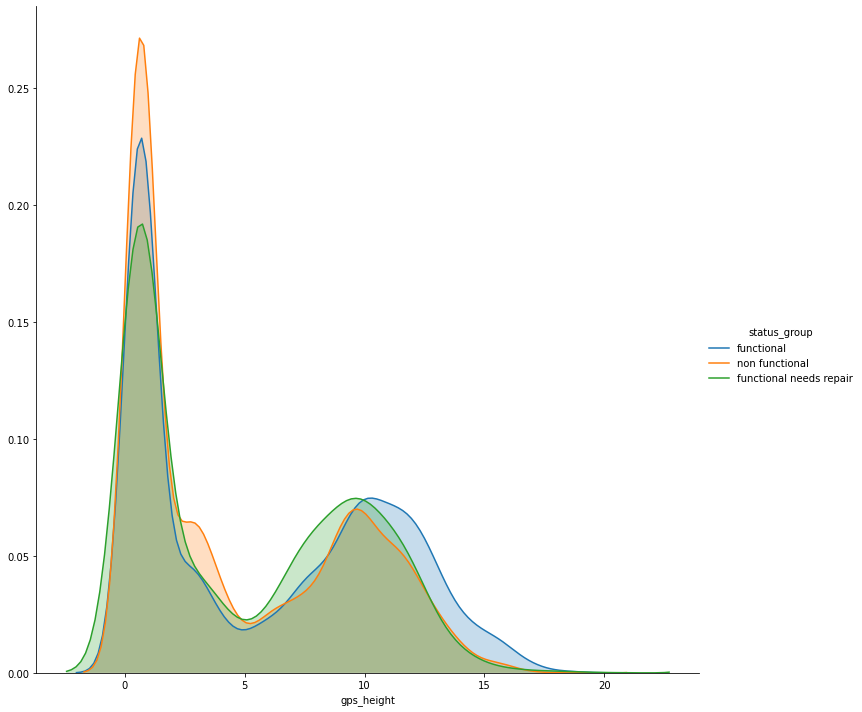

In [ ]:
# (sns
#   .FacetGrid(data, 
#              hue='status_group',size=10)
#   .map(sns.kdeplot, 'gps_height', shade=True)
#  .add_legend()
# )

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


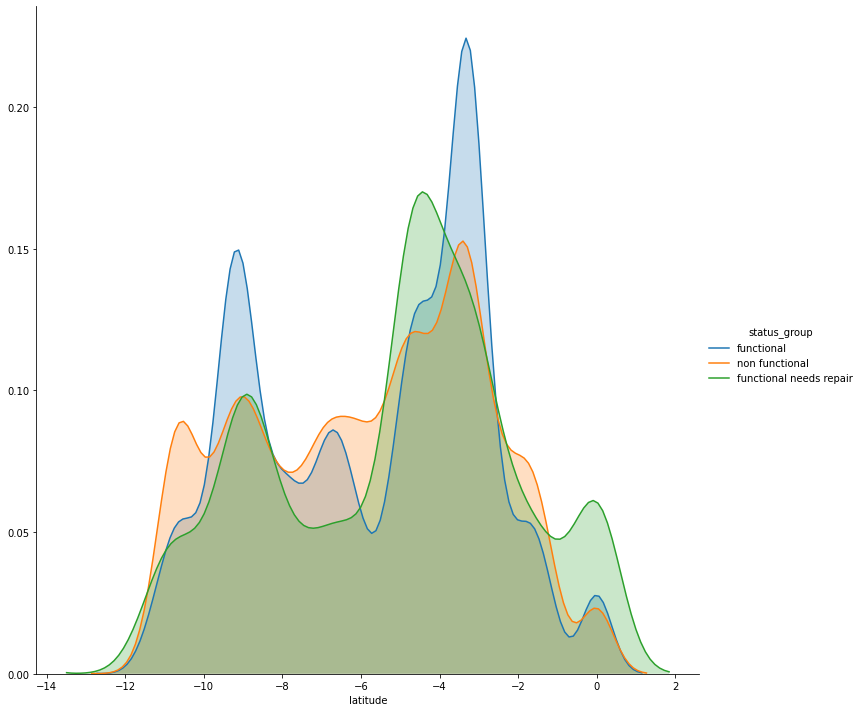

In [ ]:
# (sns
#   .FacetGrid(data, 
#              hue='status_group',size=10)
#   .map(sns.kdeplot, 'latitude', shade=True)
#  .add_legend()
# )

In [ ]:
# (sns
#   .FacetGrid(data, 
#              hue='status_group',size=10)
#   .map(sns.kdeplot, 'longitude', shade=True)
#  .add_legend()
# )

In [ ]:
# (sns
#   .FacetGrid(data, 
#              hue='status_group',size=15)
#   .map(sns.kdeplot, 'amount_tsh', shade=True)
#  .add_legend()
# )

In [ ]:
# plt.figure(figsize=(24, 9))

# sns.countplot(data=data,x='source_type',hue='status_group')

In [ ]:
# plt.figure(figsize=(24, 9))

# sns.countplot(data=data,x='extraction_type_group',hue='status_group')

In [ ]:
# plt.figure(figsize=(24, 9))

# sns.countplot(data=data,x='extraction_type_class',hue='status_group')

In [ ]:
# plt.figure(figsize=(24, 9))

# sns.countplot(data=data,x='waterpoint_type',hue='status_group')

In [ ]:
# plt.figure(figsize=(24, 9))

# sns.countplot(data=data,x='quantity',hue='status_group')

In [9]:
data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)
data['construction_year'].replace(0.0, np.nan, inplace=True)

In [10]:
data.groupby(['district_code', 'region','construction_year']).size() 

district_code  region     construction_year
0              Dodoma     0                     3
1              Arusha     0                     1
                          1990                  5
                          2000                 20
                          2010                  3
                                               ..
63             Mtwara     2011                  2
                          2012                  5
               Pwani      0                    13
67             Pwani      0                     2
80             Shinyanga  0                     1
Length: 1698, dtype: int64

In [11]:
data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)
print(data.isnull().sum())

id                          0
amount_tsh                  0
date_recorded               0
funder                    718
gps_height                  0
installer                 723
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            692
recorded_by                 0
scheme_management         800
scheme_name              5888
permit                    614
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [12]:
#if water point is old, it is highly likely to be non functional or needs repair.
#New features were created namely number of days and number of months water point is operational.
print(data.date_recorded.head(5))
print(data.construction_year.head(5))


0    2013-02-04
1    2013-02-04
2    2013-02-01
3    2013-01-22
4    2013-03-27
Name: date_recorded, dtype: object
0    2012
1    2000
2    2010
3    1987
4    2000
Name: construction_year, dtype: int64


In [13]:
data.isnull().sum()
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data.date_recorded.head(5)
print(data.date_recorded.dt.year.head(5))
print(data.construction_year.head(5))
data['operational_year'] = data.date_recorded.dt.year - data.construction_year
data.operational_year.head(5)

0    2013
1    2013
2    2013
3    2013
4    2013
Name: date_recorded, dtype: int64
0    2012
1    2000
2    2010
3    1987
4    2000
Name: construction_year, dtype: int64


0     1
1    13
2     3
3    26
4    13
Name: operational_year, dtype: int64

In [ ]:
# (sns
#   .FacetGrid(data, 
#              hue='status_group',size=14)
#   .map(sns.kdeplot, 'operational_year', shade=True)
#  .add_legend()
# )

In [ ]:
# plt.figure(figsize=(24, 9))
# sns.countplot(data=data,x='payment_type',hue='status_group')

In [14]:
#DATA Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
data.drop(waste_features,axis=1,inplace=True)
print(data.groupby(['management', 'management_group']).size() )
data.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial           157
other             other                200
other - school    other                 23
parastatal        parastatal           390
private operator  commercial           442
trust             commercial            23
unknown           unknown              101
vwc               user-group          8452
water authority   commercial           184
water board       user-group           621
wua               user-group           487
wug               user-group          1336
dtype: int64


In [15]:
print(data.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
data.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type  
afridev                handpump               afridev               372
gravity                gravity                gravity              5432
india mark ii          handpump               india mark ii         526
india mark iii         handpump               india mark iii         32
mono                   motorpump              mono                  656
nira/tanira            handpump               nira/tanira          1696
other                  other                  other                1383
other handpump         handpump               other - play pump      12
                                              other - swn 81         49
                                              walimi                 11
other motorpump        motorpump              cemo                   13
                                              climax                  7
rope pump              rope pump              other - rope pump      98


In [16]:
data.drop('extraction_type_class',axis=1,inplace=True)

In [17]:
data.groupby(['scheme_management', 'scheme_name']).size() 

scheme_management  scheme_name         
Company            BSF water supplying      1
                   Bagamoyo Wate           13
                   Bagamoyo wate           49
                   Bulamba piped scheme     1
                   Doe water supply         1
                                           ..
Water authority    Water from DAWASCO      13
                   World Bank              13
                   Yongoma                  6
                   Zepalama                 3
                   no scheme                2
Length: 1832, dtype: int64

In [18]:
data.drop('scheme_name',axis=1,inplace=True)

In [19]:
data.groupby(['payment', 'payment_type']).size() 

payment                payment_type
never pay              never pay       5341
other                  other            220
pay annually           annually         763
pay monthly            monthly         1755
pay per bucket         per bucket      1919
pay when scheme fails  on failure       755
unknown                unknown         1663
dtype: int64

In [20]:
data.drop('payment',axis=1,inplace=True)

In [21]:
data.groupby(['water_quality', 'quality_group']).size() 

water_quality       quality_group
coloured            colored            112
fluoride            fluoride            34
fluoride abandoned  fluoride             2
milky               milky              168
salty               salty             1033
salty abandoned     salty               70
soft                good             10601
unknown             unknown            396
dtype: int64

In [22]:
data.drop('quality_group',axis=1,inplace=True)

In [23]:
data.groupby(['quantity', 'quantity_group']).size() 

quantity      quantity_group
dry           dry               1301
enough        enough            6942
insufficient  insufficient      3165
seasonal      seasonal           841
unknown       unknown            167
dtype: int64

In [24]:
data.drop('quantity_group',axis=1,inplace=True)

In [25]:
data.groupby(['source', 'source_type', 'source_class']).size() 

source                source_type           source_class
dam                   dam                   surface          148
hand dtw              borehole              groundwater      201
lake                  river/lake            surface          150
machine dbh           borehole              groundwater     2340
other                 other                 unknown           41
rainwater harvesting  rainwater harvesting  surface          478
river                 river/lake            surface         1961
shallow well          shallow well          groundwater     3555
spring                spring                groundwater     3522
unknown               other                 unknown           20
dtype: int64

In [26]:
data.drop('source_type',axis=1,inplace=True)

In [27]:
data.drop('source_class',axis=1,inplace=True)

In [28]:
data.groupby(['waterpoint_type', 'waterpoint_type_group']).size() 

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              29
communal standpipe           communal standpipe       5968
communal standpipe multiple  communal standpipe       1265
dam                          dam                         1
hand pump                    hand pump                3653
improved spring              improved spring           136
other                        other                    1364
dtype: int64

In [29]:
data.drop('waterpoint_type_group',axis=1,inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12416 entries, 0 to 12415
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12416 non-null  int64         
 1   amount_tsh         12416 non-null  float64       
 2   date_recorded      12416 non-null  datetime64[ns]
 3   funder             11698 non-null  object        
 4   gps_height         12416 non-null  float64       
 5   installer          11693 non-null  object        
 6   longitude          12416 non-null  float64       
 7   latitude           12416 non-null  float64       
 8   basin              12416 non-null  object        
 9   region             12416 non-null  object        
 10  district_code      12416 non-null  int64         
 11  lga                12416 non-null  object        
 12  ward               12416 non-null  object        
 13  population         12416 non-null  float64       
 14  public

In [ ]:
# print(data.groupby(['lga', 'ward','status_group']).size() )
# #print(data.groupby(['lga', 'ward']).size() )

lga           ward     status_group           
Arusha Rural  Bangata  functional                 21
                       functional needs repair     2
                       non functional             10
              Bwawani  functional                 12
                       non functional             25
                                                  ..
Uyui          Ufuluma  non functional             10
              Upuge    functional                  7
                       non functional             11
              Usagali  functional                  8
                       non functional             17
Length: 5070, dtype: int64


In [31]:
data.drop('ward',axis=1,inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12416 entries, 0 to 12415
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12416 non-null  int64         
 1   amount_tsh         12416 non-null  float64       
 2   date_recorded      12416 non-null  datetime64[ns]
 3   funder             11698 non-null  object        
 4   gps_height         12416 non-null  float64       
 5   installer          11693 non-null  object        
 6   longitude          12416 non-null  float64       
 7   latitude           12416 non-null  float64       
 8   basin              12416 non-null  object        
 9   region             12416 non-null  object        
 10  district_code      12416 non-null  int64         
 11  lga                12416 non-null  object        
 12  population         12416 non-null  float64       
 13  public_meeting     11724 non-null  object        
 14  scheme

In [ ]:
# data.groupby(['installer', 'funder','status_group']).size() 

installer       funder                  status_group           
-               Government Of Tanzania  functional                   1
                                        non functional               1
                Kalebejo Parish         functional                   1
0               0                       functional                 445
                                        functional needs repair      3
                                                                  ... 
wizara ya maji  Serikali                functional                   2
world           World Bank              functional needs repair      1
                                        non functional               3
world banks     World Bank              non functional               1
world vision    World Vision            functional                   1
Length: 5188, dtype: int64

In [ ]:
# data.drop('installer',axis=1,inplace=True)
# INSTALLER STAYS

In [33]:
data.isnull().sum()

id                     0
amount_tsh             0
date_recorded          0
funder               718
gps_height             0
installer            723
longitude              0
latitude               0
basin                  0
region                 0
district_code          0
lga                    0
population             0
public_meeting       692
scheme_management    800
permit               614
construction_year      0
extraction_type        0
management             0
payment_type           0
water_quality          0
quantity               0
source                 0
waterpoint_type        0
operational_year       0
dtype: int64

In [34]:
data.drop('public_meeting', axis=1, inplace=True)
data.drop('permit', axis=1, inplace=True)

In [35]:
data.isnull().sum()

id                     0
amount_tsh             0
date_recorded          0
funder               718
gps_height             0
installer            723
longitude              0
latitude               0
basin                  0
region                 0
district_code          0
lga                    0
population             0
scheme_management    800
construction_year      0
extraction_type        0
management             0
payment_type           0
water_quality          0
quantity               0
source                 0
waterpoint_type        0
operational_year       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12416 entries, 0 to 12415
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12416 non-null  int64         
 1   amount_tsh         12416 non-null  float64       
 2   date_recorded      12416 non-null  datetime64[ns]
 3   funder             11698 non-null  object        
 4   gps_height         12416 non-null  float64       
 5   installer          11693 non-null  object        
 6   longitude          12416 non-null  float64       
 7   latitude           12416 non-null  float64       
 8   basin              12416 non-null  object        
 9   region             12416 non-null  object        
 10  district_code      12416 non-null  int64         
 11  lga                12416 non-null  object        
 12  population         12416 non-null  float64       
 13  scheme_management  11616 non-null  object        
 14  constr

In [37]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
data.waterpoint_type = data.waterpoint_type.str.lower()
data.funder = data.funder.str.lower()
data.basin = data.basin.str.lower()
data.region = data.region.str.lower()
data.source = data.source.str.lower()
data.lga = data.lga.str.lower()
data.management = data.management.str.lower()
data.quantity = data.quantity.str.lower()
data.water_quality = data.water_quality.str.lower()
data.payment_type=data.payment_type.str.lower()
data.extraction_type=data.extraction_type.str.lower()

In [39]:
data["funder"].fillna("other", inplace=True)
data["scheme_management"].fillna("other", inplace=True)
data["installer"].fillna("other", inplace=True)
print(data.isnull().sum())
data.drop('date_recorded', axis=1, inplace=True)
data.drop('construction_year', axis=1, inplace=True)
data.info()
data.quantity.head(5)
pd.DataFrame(data).to_csv("/content/clean.csv")

id                   0
amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
operational_year     0
dtype: int64


KeyError: ignored